In [ ]:
# Paper Title: The Golden Rule as a Fairness Heuristic 
# Submitted to Journal of Philosophy and Technology, Spriner Nature Publishing. 

# Install the following when running for first time 

import sys
!{sys.executable} -m pip install seaborn 
!{sys.executable} -m pip install spacy
!{sys.executable} -m pip install pyinflect
!{sys.executable} -m pip install lemminflect
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install transformers
!{sys.executable} -m pip install tensorflow #(or install using anaconda if denied access: https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/ )
!{sys.executable} -m pip install -U pytorch-pretrained-bert
!pip install https://github.com/MartinoMensio/spacy-universal-sentence-encoder/releases/download/v0.4.3/en_use_md-0.4.3.tar.gz 
!pip install fitbert
!pip install wonderwords
!pip install pattern
!pip install spacy-universal-sentence-encoder


In [ ]:
!pip install spacy

In [ ]:
import lemminflect 
import gzip
import transformers
transformers.__version__
from transformers import pipeline
import pyinflect
import wonderwords
import spacy
import matplotlib.pyplot as plt
from spacy import displacy
import scipy.stats as stats
import numpy as np
import os
import pandas as pd
from pylab import rcParams
import docx
import re
import seaborn as sns
import nltk 
from nltk.corpus import wordnet 
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
import re
import sympy
import torch
torch.cuda.is_available()  #(if not available: it may be that there is no GPU in the computer)
import seaborn as sns
from fitbert import FitBert
fb = FitBert()
import random
from wonderwords import RandomWord
from wonderwords import RandomSentence
s = RandomSentence()
r = RandomWord()
unmasker = pipeline('fill-mask', model='albert-xxlarge-v2')
#Load the Universal Sentence Encoder's TF Hub module
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)
#nlp = spacy.load('en_core_web_lg')#  "conda install -c conda-forge spacy" @ anaconda prompt,  python -m spacy download en
#The NLP parser 
#from spacy import en_core_web_lg
#nlp = en_core_web_lg.load()
nlp = spacy.load('en_core_web_sm')



In [2]:
#import the data that will be tested with the code e.g. test sentences 

from fair_unfair import fair_unfair
from thirty_six_fair_unfair import thirty_six_fair_unfair 


pd.options.display.max_rows = 400

In [3]:
#Build Sentence FairVec (S-FairVec) using 10 abstract concepts to represent the social ontology of fairness 
 
res = "is was very responsible"
resA = [res]
resV = embed(resA)

irres = "is was very irresponsible"
irresA = [irres]
irresV = embed(irresA)

joy = "it was joyous"
joyA = [joy]
joyV = embed(joyA)

pain = "it was sad"
painA = [pain]
painV = embed(painA)

ben = "it was beneficial to society"
benA = [ben]
benV = embed(benA)

har = "it was not beneficial to society"
harA = [har]
harV = embed(harA)

#lib = "liberty"
lib = "was free to and rewarded"
libA = [lib]
libV = embed(libA)

pri = "was sent to prison and punished"
priA = [pri]
priV = embed(priA)

app = "it was beneficial"
appA = [app]
appV = embed(appA)

inapp = "it was harmful"
inappA = [inapp]
inappV = embed(inappA)


ResponsibilityV = resV - irresV 
EmotionV = joyV - painV 
ConsequenceV = libV - priV   
BeneficialV = benV - harV 
HarmV = appV - inappV  

#This is S-FairVec which combines the above vectors into one (it needs error minimisation)
SFairVec = resV - irresV + joyV - painV  + libV - priV   + benV - harV  + appV - inappV #+ desV - notDesV

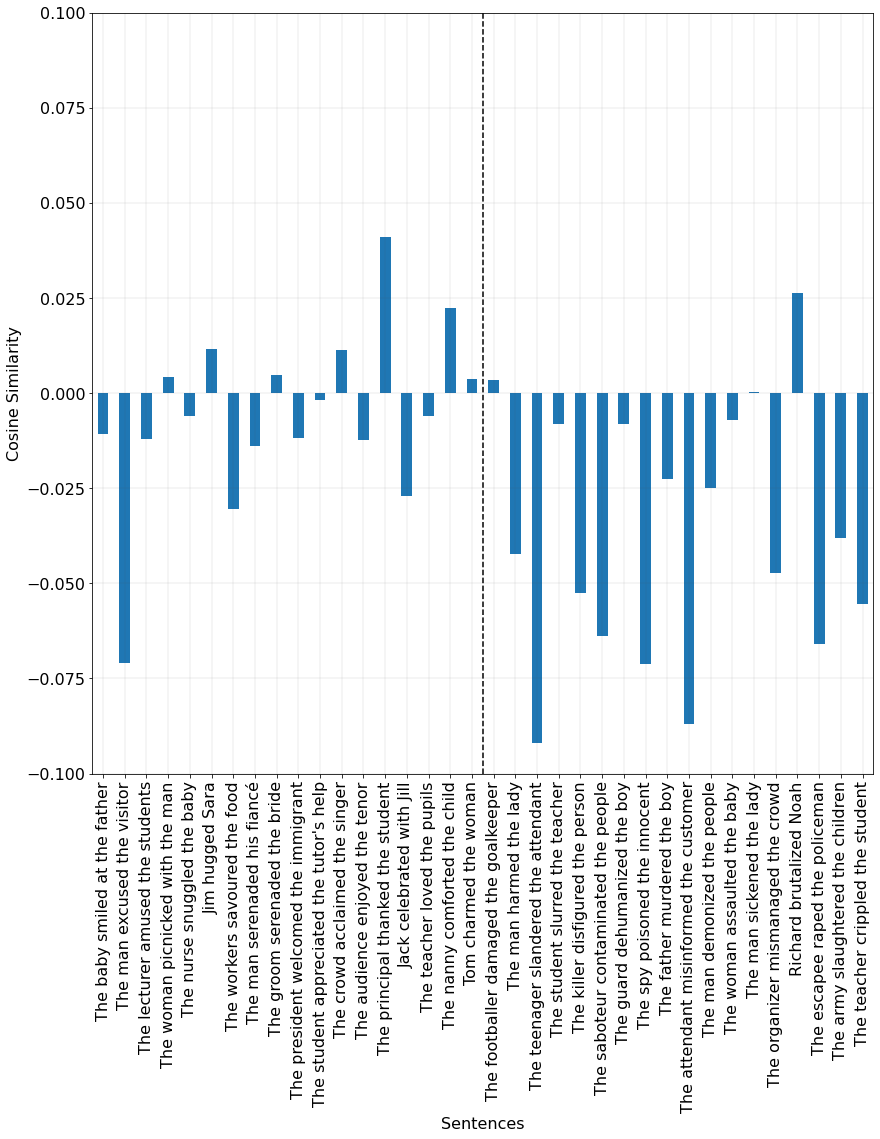

In [4]:
#Function to compare FairVec agaist a list of the randomly selected 36 sentences

fair_s = "it was fair"
fair_sA = [fair_s]
fair_sV = embed(fair_sA)

unfair_s = "it was unfair"
unfair_sA = [unfair_s]
unfair_sV = embed(unfair_sA)

word_fair_unfair= fair_sV-unfair_sV

def run_word_fairVec(sentences_to_test):
    word_FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(word_fair_unfair,sentence_embeddings[i])
        word_FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    word_df_fairness=pd.DataFrame(word_FairVecResults)
    word_df_fairness['Score'] = word_df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    word_df_fairness['Sentence'] = word_df_fairness['Sentence'].astype(str)
    return word_df_fairness#.sort_values(by='Score', ascending=False)



#Carry out word_FairVec
word_fair_results=run_word_fairVec(thirty_six_fair_unfair)

ax_word_fair = word_fair_results.plot.bar(x='Sentence', y='Score', legend=False, figsize=(14,14))
ax_word_fair.tick_params(labelbottom=True,labeltop=False)
plt.xticks(rotation = 90)
ax_word_fair.axvline(17.5, color='k', linestyle='--')
ax_word_fair.set_facecolor("white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=16)
plt.xlabel('Sentences', fontsize=16)
plt.ylim(-0.1, 0.1)
plt.grid(True, which='both')

plt.show()



#, rot=90, figsize=(14,14))


(array([-0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

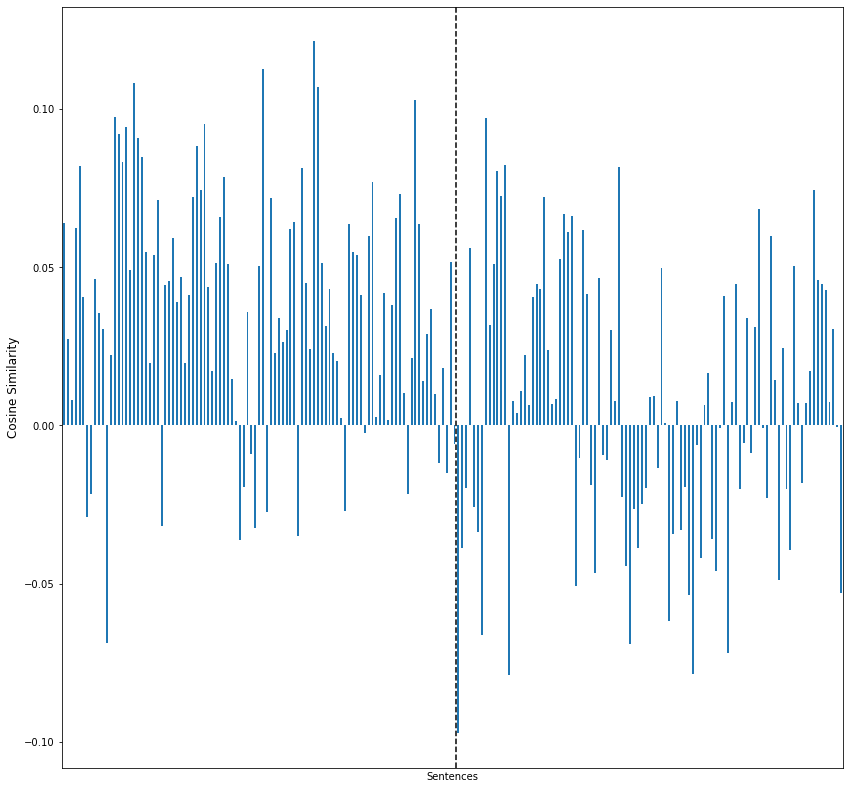

In [5]:
#Function to compare FairVec agaist the full list 200 of sentences

fair_s = "it was fair"
fair_sA = [fair_s]
fair_sV = embed(fair_sA)

unfair_s = "it was not fair"
unfair_sA = [unfair_s]
unfair_sV = embed(unfair_sA)

word_fair_unfair= fair_sV-unfair_sV

def run_word_fairVec(sentences_to_test):
    word_FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(word_fair_unfair,sentence_embeddings[i])
        word_FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    word_df_fairness=pd.DataFrame(word_FairVecResults)
    word_df_fairness['Score'] = word_df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    word_df_fairness['Sentence'] = word_df_fairness['Sentence'].astype(str)
    return word_df_fairness#.sort_values(by='Score', ascending=False)

#Carry out word_FairVec
word_fair_results=run_word_fairVec(fair_unfair)
ax_word_fair = word_fair_results.plot.bar(x='Sentence', y='Score', rot=90,figsize=(14,14), fontsize=(4), legend=False )
ax_word_fair.axvline(100.5, color='k', linestyle='--')
plt.ylabel('Cosine Similarity', fontsize=12)
plt.xlabel('Sentences', fontsize=10)
plt.xticks([])
ax_word_fair.set_facecolor("white")
plt.yticks(fontsize=10)

#word_sorted_results=word_fair_results.sort_values(by='Score', ascending=False)
#print(sorted_results)

(array([-0.125, -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,
         0.075]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

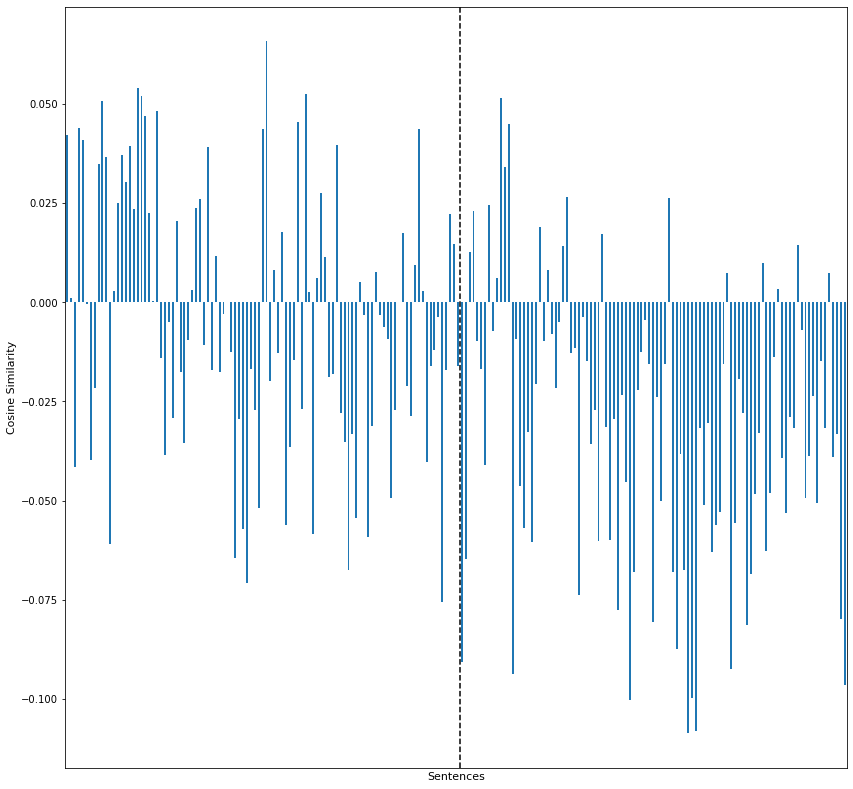

In [6]:
#Function to compare FairVec agaist the full list 200 of sentences

fair_s = "it was fair"
fair_sA = [fair_s]
fair_sV = embed(fair_sA)

unfair_s = "it was unfair"
unfair_sA = [unfair_s]
unfair_sV = embed(unfair_sA)

word_fair_unfair= fair_sV-unfair_sV

def run_word_fairVec(sentences_to_test):
    word_FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(word_fair_unfair,sentence_embeddings[i])
        word_FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    word_df_fairness=pd.DataFrame(word_FairVecResults)
    word_df_fairness['Score'] = word_df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    word_df_fairness['Sentence'] = word_df_fairness['Sentence'].astype(str)
    return word_df_fairness#.sort_values(by='Score', ascending=False)

#Carry out word_FairVec
word_fair_results=run_word_fairVec(fair_unfair)
ax_word_fair = word_fair_results.plot.bar(x='Sentence', y='Score', rot=90,figsize=(14,14), fontsize=(4), legend=False )
ax_word_fair.axvline(100.5, color='k', linestyle='--')
plt.ylabel('Cosine Similarity', fontsize=11)
plt.xlabel('Sentences', fontsize=11)
plt.xticks([])
ax_word_fair.set_facecolor("white")
plt.yticks(fontsize=10)
#word_sorted_results=word_fair_results.sort_values(by='Score', ascending=False)
#print(sorted_results)

In [7]:
print(word_fair_results)

        Score                                   Sentence
0    0.042243                  The baby loved the mother
1    0.001143                  The baby loved the father
2   -0.041557              The brother helped the sister
3    0.043792                     The boy loved the girl
4    0.041001                   The boy cradled the baby
5   -0.000479                  The father loved the baby
6   -0.039745                              Tom liked Tim
7   -0.021564                           Jane adored Mary
8    0.034831                  The girl adored the actor
9    0.050743               The actor hugged the actress
10   0.036692               The actor kissed the actress
11  -0.061024                            Mary adored Tim
12   0.002720                        The girl adored Tom
13   0.024924                    The man thanked the man
14   0.037191                  The man thanked the woman
15   0.030226                  The woman thanked the man
16   0.039416               The

In [8]:
#Function to compare FairVec agaist a list of sentences

def run_fairVec(sentences_to_test):
    FairVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
   
   # sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(SFairVec,sentence_embeddings[i])
        
        FairVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )
  
    df_fairness=pd.DataFrame(FairVecResults)
    df_fairness['Score'] = df_fairness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    df_fairness['Sentence'] = df_fairness['Sentence'].astype(str)
    return df_fairness#.sort_values(by='Score', ascending=False)


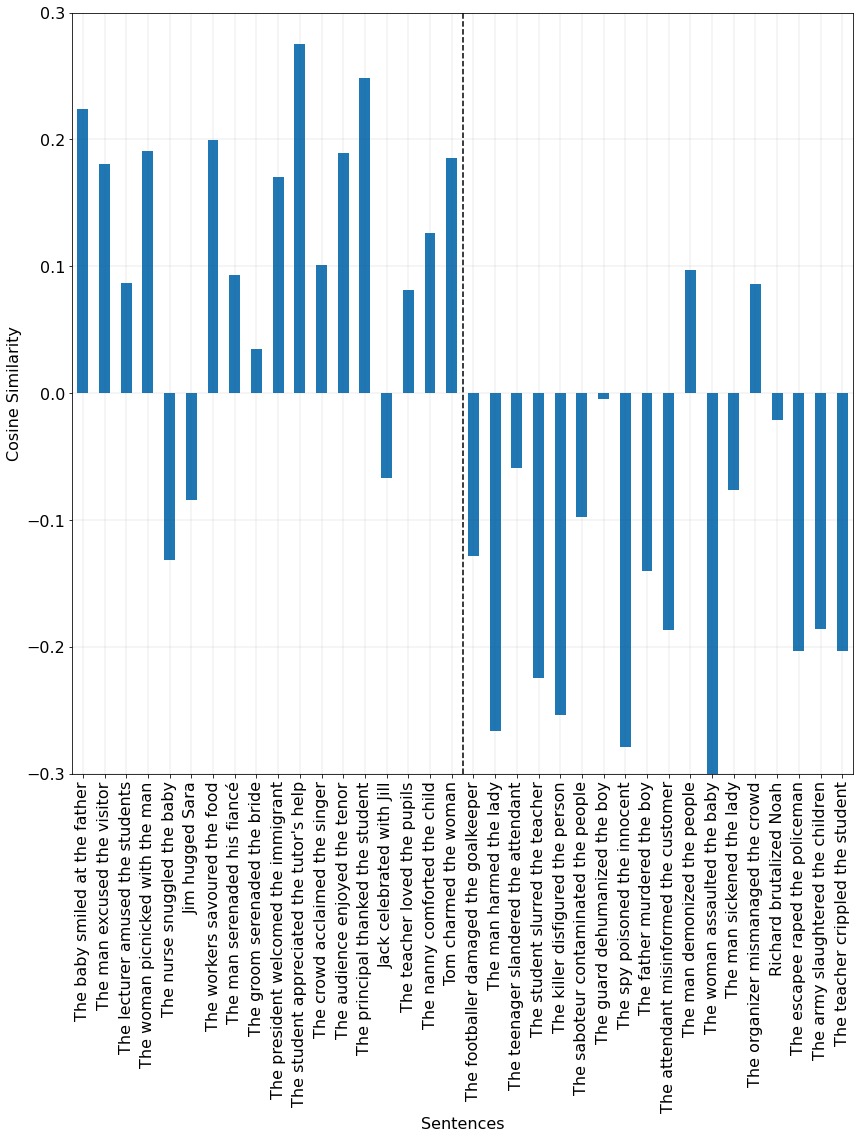

In [9]:
#Carry out FairVec



fair_results_36=run_fairVec(thirty_six_fair_unfair)
ax_word_fair_36 = fair_results_36.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_word_fair_36.axvline(17.5, color='k', linestyle='--')

plt.xticks(fontsize=15)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=16)
plt.xlabel('Sentences', fontsize=16)
ax_word_fair_36.grid('on', which='major', axis='x' )
ax_word_fair_36.grid('on', which='major', axis='y' )
 
ax_word_fair_36.set_facecolor("white")
plt.yticks(fontsize=10)

 
ax_word_fair.tick_params(labelbottom=True,labeltop=False)
plt.xticks(rotation = 90)
 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.ylim(-0.3, 0.3)
plt.grid(True, which='both')

plt.show()





In [10]:
import nltk
nltk.download('vader_lexicon')

#Carry out sentiment score of list of 36 fair unfair list and correlate 
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
nltk_results = [nltk_sentiment(row) for row in thirty_six_fair_unfair]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(thirty_six_fair_unfair, columns = ['text'])
nltk_df = text_df.join(results_df)
nltk_df['compound'].corr(fair_results_36['Score'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0.6728072176338173

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

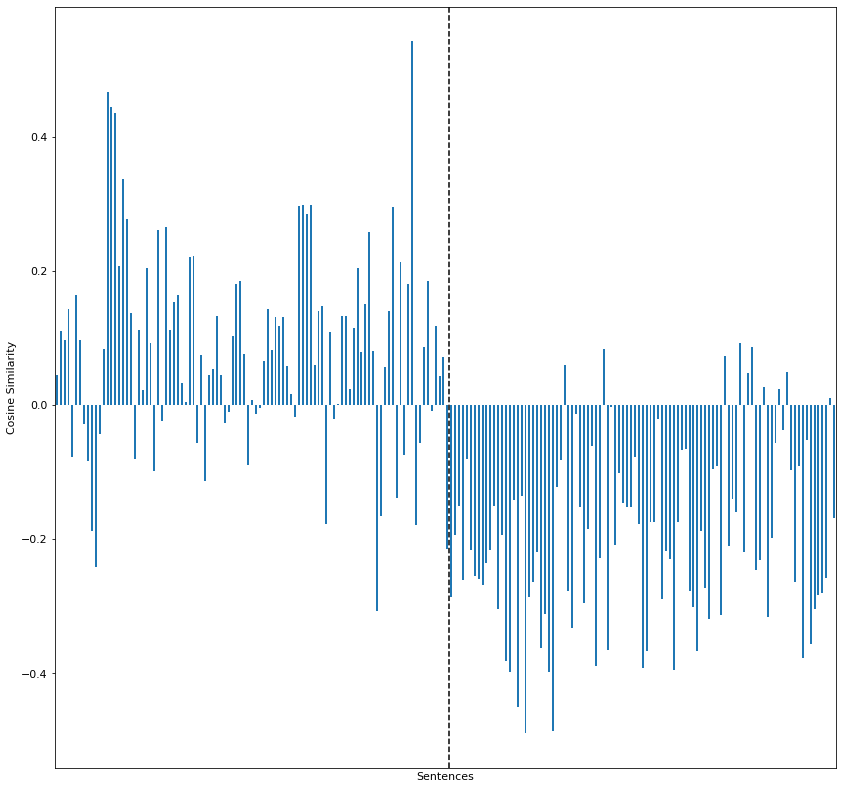

In [11]:
#Carry out FairVec on full list
fair_results_200=run_fairVec(fair_unfair)
ax_word_fair_200 = fair_results_200.plot.bar(x='Sentence', y='Score', rot=90, figsize=(14,14), fontsize=(4), legend=False )
ax_word_fair_200.axvline(100.5, color='k', linestyle='--')
plt.tick_params(axis='y', labelsize=11)
plt.ylabel('Cosine Similarity', fontsize=11)
plt.xlabel('Sentences', fontsize=11)
plt.xticks([])
ax_word_fair_200.set_facecolor("white")
plt.yticks(fontsize=11)


#sorted_results=fair_results.sort_values(by='Score', ascending=False)
#print(sorted_results)

In [12]:
print(fair_results_200)

        Score                                   Sentence
0    0.044595                  The baby loved the mother
1    0.109776                  The baby loved the father
2    0.096097              The brother helped the sister
3    0.142569                     The boy loved the girl
4   -0.077340                   The boy cradled the baby
5    0.164209                  The father loved the baby
6    0.096056                              Tom liked Tim
7   -0.028404                           Jane adored Mary
8   -0.083190                  The girl adored the actor
9   -0.188346               The actor hugged the actress
10  -0.242284               The actor kissed the actress
11  -0.043983                            Mary adored Tim
12   0.083510                        The girl adored Tom
13   0.466649                    The man thanked the man
14   0.443900                  The man thanked the woman
15   0.434632                  The woman thanked the man
16   0.206902               The

In [13]:
#Carry out sentiment score of full fair unfair list and correlate 
nltk_results = [nltk_sentiment(row) for row in fair_unfair]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(fair_unfair, columns = ['text'])
nltk_df = text_df.join(results_df)
print(nltk_df)

nltk_df['compound'].corr(fair_results_200['Score'])

                                          text    neg    neu    pos  compound
0                    The baby loved the mother  0.000  0.506  0.494    0.5994
1                    The baby loved the father  0.000  0.506  0.494    0.5994
2                The brother helped the sister  0.000  1.000  0.000    0.0000
3                       The boy loved the girl  0.000  0.506  0.494    0.5994
4                     The boy cradled the baby  0.000  1.000  0.000    0.0000
5                    The father loved the baby  0.000  0.506  0.494    0.5994
6                                Tom liked Tim  0.000  0.417  0.583    0.4215
7                             Jane adored Mary  0.000  0.417  0.583    0.4215
8                    The girl adored the actor  0.000  0.588  0.412    0.4215
9                 The actor hugged the actress  0.000  0.597  0.403    0.4019
10                The actor kissed the actress  0.000  0.606  0.394    0.3818
11                             Mary adored Tim  0.000  0.417  0.

0.665099364818791

In [14]:

nltk_df['compound'].corr(fair_results_200['Score'])

0.665099364818791

In [15]:
#Function to compare Fair-Unfair vec agaist a list of complete sentences

fa = "it was fair"# 
faE = [fa]
faV = embed(faE)

unfa = "it was unfair" 
unfaE = [unfa]
unfaV = embed(unfaE)

fairWordsVec= faV-unfaV

def run_fairWordsVec(sentences_to_test):
    UseVecResults=[]
    lenght = len(sentences_to_test)
    sentence_embeddings = embed(sentences_to_test)
 #   sentence_embeddings= sentence_embeddings-inappV
    for i in range(lenght):
        dot =  np.inner(fairWordsVec,sentence_embeddings[i])
        UseVecResults.append(
            {
                'Score': dot,
                'Sentence':sentences_to_test[i],
            }

        )

    df_usefullness=pd.DataFrame(UseVecResults)
    df_usefullness['Score'] = df_usefullness['Score'].astype(float)
    #df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
    df_usefullness['Sentence'] = df_usefullness['Sentence'].astype(str)
    return df_usefullness#.sort_values(by='Score', ascending=False)


In [16]:
fw_results=run_fairWordsVec(fair_unfair)

In [17]:
print(fw_results)

        Score                                   Sentence
0    0.042243                  The baby loved the mother
1    0.001143                  The baby loved the father
2   -0.041557              The brother helped the sister
3    0.043792                     The boy loved the girl
4    0.041001                   The boy cradled the baby
5   -0.000479                  The father loved the baby
6   -0.039745                              Tom liked Tim
7   -0.021564                           Jane adored Mary
8    0.034831                  The girl adored the actor
9    0.050743               The actor hugged the actress
10   0.036692               The actor kissed the actress
11  -0.061024                            Mary adored Tim
12   0.002720                        The girl adored Tom
13   0.024924                    The man thanked the man
14   0.037191                  The man thanked the woman
15   0.030226                  The woman thanked the man
16   0.039416               The

In [18]:
fw_results=run_fairWordsVec(fair_unfair)
sorted_results_fw=fw_results.sort_values(by='Score', ascending=False)
print(sorted_results_fw)

        Score                                   Sentence
51   0.065744                The child obeyed his mother
18   0.053992               The police thanked the woman
61   0.052425                The husband hugged the wife
19   0.051967              The police thanked the police
111  0.051405                   the girl slapped the boy
9    0.050743               The actor hugged the actress
23   0.048068                     The wife loved the son
20   0.046812             The husband comforted his wife
59   0.045450                 The husband dined the wife
113  0.044967                  The girl slapped the baby
3    0.043792                     The boy loved the girl
50   0.043693                   The lady bathed the baby
90   0.043602               The crowd cheered the singer
0    0.042243                  The baby loved the mother
4    0.041001                   The boy cradled the baby
69   0.039691             The actor romanced the actress
16   0.039416               The

In [19]:
def run_want_vec(sentence):
    
    sentenceA = [sentence]
    sentenceE = embed(sentenceA)
    sentenceE  = sentenceE 

    parced =  nlp(sentence)

    for token in parced:  #get tokens of parse sentence

        
        if token.dep_ == "dobj":  #get the object and store in dobj
            
            s1=["the", token.text, "would require it"] 
            global desire
            desire =' '.join(s1)
           
            s2=["the", token.text, "would despise it"]
            global notDesire
            notDesire = ' '.join(s2)

            s3=["the", token.text, "was happy by it"]
            global happyBy
            happyBy =' '.join(s3)
            
            s4=["the", token.text, "was unhappy by it"]
            global notHappyBy
            notHappyBy = ' '.join(s4)

            s5=["the", token.text, "would demand they did it"]
            global continuedIt
            continuedIt =' '.join(s5)

            s6=["the", token.text, "would demand they stopped it"]  
            global stoppedIt
            stoppedIt = ' '.join(s6)
            
            s7=["the", token.text, "would wish it continue"]
            global continuedIt2
            continuedIt2 =' '.join(s7)

            s8=["the", token.text, "would wish it stop"]  
            global stoppedIt2
            stoppedIt2 = ' '.join(s8)
            

    #Save WantVec phrases    
    input_rephrased_sentences_to_test_with_want=[]
    input_rephrased_sentences_to_test_with_notWant=[]
    input_rephrased_sentences_to_test_with_want2=[]
    input_rephrased_sentences_to_test_with_notWant2=[]
    input_rephrased_sentences_to_test_with_want3=[]
    input_rephrased_sentences_to_test_with_notWant3=[]
    input_rephrased_sentences_to_test_with_want4=[]
    input_rephrased_sentences_to_test_with_notWant4=[]
    input_rephrased_sentences_to_test_with_want.append(desire)
    input_rephrased_sentences_to_test_with_notWant.append(notDesire)
    input_rephrased_sentences_to_test_with_want2.append(happyBy)
    input_rephrased_sentences_to_test_with_notWant2.append(notHappyBy)
    input_rephrased_sentences_to_test_with_want3.append(continuedIt)
    input_rephrased_sentences_to_test_with_notWant3.append(stoppedIt) 
    input_rephrased_sentences_to_test_with_want4.append(continuedIt2)
    input_rephrased_sentences_to_test_with_notWant4.append(stoppedIt2) 
    #Embed WantVec phrases

    sentence_embeddings_want = embed(input_rephrased_sentences_to_test_with_want) 
    sentence_embeddings_notWant = embed(input_rephrased_sentences_to_test_with_notWant)
    sentence_embeddings_want2 = embed(input_rephrased_sentences_to_test_with_want2) 
    sentence_embeddings_notWant2 = embed(input_rephrased_sentences_to_test_with_notWant2)
    sentence_embeddings_want3 = embed(input_rephrased_sentences_to_test_with_want3)
    sentence_embeddings_notWant3 = embed(input_rephrased_sentences_to_test_with_notWant3) 
    sentence_embeddings_want4 = embed(input_rephrased_sentences_to_test_with_want4)
    sentence_embeddings_notWant4 = embed(input_rephrased_sentences_to_test_with_notWant4) 
    #Construct S-WantVec from re-phrased sentences
    global SWantVec
    SWantVec = sentence_embeddings_want - sentence_embeddings_notWant + sentence_embeddings_want2 - sentence_embeddings_notWant2 + sentence_embeddings_want3 - sentence_embeddings_notWant3 +sentence_embeddings_want4 - sentence_embeddings_notWant4  



    #Calculate dot product of S-WantVec
    
    dot2 =  np.inner(SWantVec,sentenceE)
    
    return(dot2,sentence,stoppedIt2)    


#Next run Want vec on the re-phrased sentences

SWantResults=[]
lenght = len(fair_unfair)
for j in range(lenght): 
    WantScore=run_want_vec(fair_unfair[j])
    SWantResults.append(WantScore)

df_wantedness = pd.DataFrame(SWantResults, columns =['Score', 'Sentence','s1']) 
 
#df_wantedness.sort_values(by='Score', ascending=False)  

In [20]:
#Copy of above 
def run_want_vec(sentence):
    
    sentenceA = [sentence]
    sentenceE = embed(sentenceA)
    sentenceE  = sentenceE 

    parced =  nlp(sentence)

    for token in parced:  #get tokens of parse sentence

        
        if token.dep_ == "dobj":  #get the object and store in dobj
            
            s1=["the", token.text, "would require it"] 
            global desire
            desire =' '.join(s1)
           
            s2=["the", token.text, "would despise it"]
            global notDesire
            notDesire = ' '.join(s2)

            s3=["the", token.text, "was happy by it"]
            global happyBy
            happyBy =' '.join(s3)
            
            s4=["the", token.text, "was unhappy by it"]
            global notHappyBy
            notHappyBy = ' '.join(s4)

            s5=["the", token.text, "would demand they did it"]
            global continuedIt
            continuedIt =' '.join(s5)

            s6=["the", token.text, "would demand they stopped it"]  
            global stoppedIt
            stoppedIt = ' '.join(s6)
            
            s7=["the", token.text, "would wish it continue"]
            global continuedIt2
            continuedIt2 =' '.join(s7)

            s8=["the", token.text, "would wish it stop"]  
            global stoppedIt2
            stoppedIt2 = ' '.join(s8)
            

    #Save WantVec phrases    
    input_rephrased_sentences_to_test_with_want=[]
    input_rephrased_sentences_to_test_with_notWant=[]
    input_rephrased_sentences_to_test_with_want2=[]
    input_rephrased_sentences_to_test_with_notWant2=[]
    input_rephrased_sentences_to_test_with_want3=[]
    input_rephrased_sentences_to_test_with_notWant3=[]
    input_rephrased_sentences_to_test_with_want4=[]
    input_rephrased_sentences_to_test_with_notWant4=[]
    input_rephrased_sentences_to_test_with_want.append(desire)
    input_rephrased_sentences_to_test_with_notWant.append(notDesire)
    input_rephrased_sentences_to_test_with_want2.append(happyBy)
    input_rephrased_sentences_to_test_with_notWant2.append(notHappyBy)
    input_rephrased_sentences_to_test_with_want3.append(continuedIt)
    input_rephrased_sentences_to_test_with_notWant3.append(stoppedIt) 
    input_rephrased_sentences_to_test_with_want4.append(continuedIt2)
    input_rephrased_sentences_to_test_with_notWant4.append(stoppedIt2) 
    #Embed WantVec phrases

    sentence_embeddings_want = embed(input_rephrased_sentences_to_test_with_want) 
    sentence_embeddings_notWant = embed(input_rephrased_sentences_to_test_with_notWant)
    sentence_embeddings_want2 = embed(input_rephrased_sentences_to_test_with_want2) 
    sentence_embeddings_notWant2 = embed(input_rephrased_sentences_to_test_with_notWant2)
    sentence_embeddings_want3 = embed(input_rephrased_sentences_to_test_with_want3)
    sentence_embeddings_notWant3 = embed(input_rephrased_sentences_to_test_with_notWant3) 
    sentence_embeddings_want4 = embed(input_rephrased_sentences_to_test_with_want4)
    sentence_embeddings_notWant4 = embed(input_rephrased_sentences_to_test_with_notWant4) 
    #Construct S-WantVec from re-phrased sentences
    global SWantVec
    SWantVec = sentence_embeddings_want - sentence_embeddings_notWant + sentence_embeddings_want2 - sentence_embeddings_notWant2 + sentence_embeddings_want3 - sentence_embeddings_notWant3 +sentence_embeddings_want4 - sentence_embeddings_notWant4  



    #Calculate dot product of S-WantVec
    
    dot2 =  np.inner(SWantVec,sentenceE)
    
    return(dot2,sentence,stoppedIt2)    


#Next run Want vec on the re-phrased sentences

SWantResults=[]
lenght = len(fair_unfair)
for j in range(lenght): 
    WantScore=run_want_vec(fair_unfair[j])
    SWantResults.append(WantScore)

df_wantedness = pd.DataFrame(SWantResults, columns =['Score', 'Sentence','s1']) 
 
#df_wantedness.sort_values(by='Score', ascending=False)  

In [21]:
df_wantedness['Score'] = df_wantedness['Score'].astype(float)
#df_wantedness_even_if_punative['Score2'] = df_wantedness_even_if_punative['Score2'].astype(float)
df_wantedness['Sentence'] = df_wantedness['Sentence'].astype(str)   
df_wantedness['s1'] = df_wantedness['s1'].astype(str)   

In [22]:
display(df_wantedness)

,Score,Sentence,s1
0,0.083777,The baby loved the mother,the mother would wish it stop
1,0.086454,The baby loved the father,the father would wish it stop
2,0.079335,The brother helped the sister,the sister would wish it stop
3,0.042717,The boy loved the girl,the girl would wish it stop
4,0.012274,The boy cradled the baby,the baby would wish it stop
5,0.106298,The father loved the baby,the baby would wish it stop
6,-0.067826,Tom liked Tim,the baby would wish it stop
7,0.011044,Jane adored Mary,the Mary would wish it stop
8,-0.039359,The girl adored the actor,the actor would wish it stop
9,0.044222,The actor hugged the actress,the actress would wish it stop


In [23]:
want_score=df_wantedness


In [24]:
print(want_score)

        Score                                   Sentence  \
0    0.083777                  The baby loved the mother   
1    0.086454                  The baby loved the father   
2    0.079335              The brother helped the sister   
3    0.042717                     The boy loved the girl   
4    0.012274                   The boy cradled the baby   
5    0.106298                  The father loved the baby   
6   -0.067826                              Tom liked Tim   
7    0.011044                           Jane adored Mary   
8   -0.039359                  The girl adored the actor   
9    0.044222               The actor hugged the actress   
10   0.064426               The actor kissed the actress   
11  -0.092576                            Mary adored Tim   
12  -0.021828                        The girl adored Tom   
13   0.200341                    The man thanked the man   
14   0.174809                  The man thanked the woman   
15   0.114847                  The woman

In [25]:
result_want_vec=df_wantedness.sort_values(by='Score', ascending=False) 
print(result_want_vec)

        Score                                   Sentence  \
13   0.200341                    The man thanked the man   
18   0.186186               The police thanked the woman   
19   0.175391              The police thanked the police   
14   0.174809                  The man thanked the woman   
37   0.160981             The sailor guided the seafarer   
35   0.151171      The detective welcomed the defendant    
23   0.145803                     The wife loved the son   
28   0.140889                   The man charmed the lady   
76   0.124738           The security trusted the manager   
36   0.120276                 The child cleaned the baby   
86   0.119126            The caretaker cleaned the house   
16   0.118316               The woman thanked the police   
15   0.114847                  The woman thanked the man   
60   0.108878                            Mary taught Sam   
5    0.106298                  The father loved the baby   
31   0.104428        The president greet

In [26]:
# GR-Vec: Masking using ALBERT

In [27]:
#Test
outcome=unmasker("A theif would [MASK] want to have his belongings stolen.")
print(outcome) 
outcome=unmasker("A killer would [MASK] be happy being murdered.")
print(outcome) 
outcome=unmasker("A woman would [MASK] be happy being paid less than a man.")
print(outcome)
outcome=unmasker("A woman would [MASK] be happy to be treated well by a man.")
print(outcome)
outcome=unmasker("A boy would [MASK] be happy to be tortured by a man.")
print(outcome)
outcome=unmasker("A woman would [MASK] be happy to be paid less than a man.")
print(outcome) 


[{'sequence': 'a theif would never want to have his belongings stolen.', 'score': 0.4211929738521576, 'token': 243, 'token_str': 'never'}, {'sequence': 'a theif would not want to have his belongings stolen.', 'score': 0.34493744373321533, 'token': 52, 'token_str': 'not'}, {'sequence': 'a theif would hardly want to have his belongings stolen.', 'score': 0.05397896096110344, 'token': 5943, 'token_str': 'hardly'}, {'sequence': 'a theif would definitely want to have his belongings stolen.', 'score': 0.02536223828792572, 'token': 4939, 'token_str': 'definitely'}, {'sequence': 'a theif would certainly want to have his belongings stolen.', 'score': 0.017118139192461967, 'token': 3850, 'token_str': 'certainly'}]
[{'sequence': 'a killer would never be happy being murdered.', 'score': 0.712061882019043, 'token': 243, 'token_str': 'never'}, {'sequence': 'a killer would not be happy being murdered.', 'score': 0.16385531425476074, 'token': 52, 'token_str': 'not'}, {'sequence': 'a killer would hardl

In [28]:
#Test FitBert

masked_string = "A theif would ***mask*** want to have his belongings stolen"
options = ['not', 'definitely', 'always']

ranked_options = fb.rank(masked_string, options=options)

print(ranked_options)

filled_in = fb.fitb(masked_string, options=options)
print(filled_in)


['not', 'definitely', 'always']
A theif would not want to have his belongings stolen


In [29]:
masked_string = "A black man would ***mask*** want to be arrested for being black"
options = ['not', 'definitely', 'always']

ranked_options = fb.rank(masked_string, options=options)

print(ranked_options)

filled_in = fb.fitb(masked_string, options=options)
print(filled_in)


['not', 'always', 'definitely']
A black man would not want to be arrested for being black


In [30]:
outcome=unmasker("A woman would be [MASK] being paid")

print(outcome) 

[{'sequence': 'a woman would be theyre being paid', 'score': 0.02253698743879795, 'token': 9167, 'token_str': 'theyre'}, {'sequence': 'a woman would be evalle being paid', 'score': 0.018880724906921387, 'token': 29833, 'token_str': 'evalle'}, {'sequence': 'a woman would be youre being paid', 'score': 0.011286233551800251, 'token': 2680, 'token_str': 'youre'}, {'sequence': 'a woman would be shouldnt being paid', 'score': 0.0078117502853274345, 'token': 18249, 'token_str': 'shouldnt'}, {'sequence': 'a woman would be ashamed being paid', 'score': 0.0074679129756987095, 'token': 16653, 'token_str': 'ashamed'}]


In [31]:
masked_string = "A theif would ***mask*** want to have his belongings stolen"
options = ['not', 'definitely', 'always']

ranked_options = fb.rank(masked_string, options=options)

print(ranked_options)

filled_in = fb.fitb(masked_string, options=options)
print(filled_in)

['not', 'definitely', 'always']
A theif would not want to have his belongings stolen


In [32]:
masked_string = "A woman would ***mask*** want to be paid less than a man"
options = ['not', 'always']

ranked_options = fb.rank(masked_string, options=options)
print(ranked_options)

filled_in = fb.fitb(masked_string, options=options)
print(filled_in)



['not', 'always']
A woman would not want to be paid less than a man


In [33]:
masked_string = "A woman would be ***mask*** being paid less than a man"
options = ['happy', 'sad']

ranked_options = fb.rank(masked_string, options=options)
# >>> ['handsome', 'strong', 'buff']
# or
print(ranked_options)
filled_in = fb.fitb(masked_string, options=options)
print(filled_in)



['happy', 'sad']
A woman would be happy being paid less than a man


In [ ]:
#Generate random verbs for GR test senteces list

for i in range (500):
    a=r.word(include_parts_of_speech=["verb"])
    print(a)

In [35]:
#Generate list of sentences for GR test

def make_random_sentence_like_do():
 
  nouns = ["policewoman", "student", "kind man", "criminal", "person", "lady", "black man", "white man", "pilot", "female" , "patient", "mailman", "therapist", "worker", "merchant", "immigrant", "survivor", "prosecutor", "sister-in-law", "coach", "doctor", "gentleman", "man", "male", "hacker", "girl", "thief", "dentist", "boy", "child", "mayor", "nanny", "president", "child", "plumber", "director", "janitor", "policeman"]
  dont_verbs = ["poisoned",  "blighted", "murdered", "necrotised", "harmed", "slurred", "brutalised", "contaminated", "attacked", "mishandled", "bloodied", "dehumanised", "beaten" , "assaulted", "crippled", "slaughtered", "bungled", "smeared",  "disfigured", "misinformed", "victimized", "demonized",  "plagued", "miscounted", "damaged",  "disarticulated", "disorganised", "sickened", "perjured", "polluted", "slandered", "mismanaged", "tortured", "aggravated", "destroyed", "massacred", "scorched", "raped", "blundered", "debilitated", "backwashed", "killed", "trivialized", "incapacitated", "traumatized", "misdirected", "outgassed",  "stigmatized", "maligned", "maimed", "decimated", "distorted", "infested", "destructed", "exacerbated", "wrecked", "brutalized",  "misreported", "bullied",  "condemned"] 
  do_verbs= ["cherished", "motivated", "listened to",  "loved", "delighted",  "thrilled", "comforted", "impressed", "on a stroll", "celebrated",  "welcomed", "complimented", "snuggled", "smiled at", "brunched with",  "exculpated", "cuddled", "serenaded", "appreciated", "enthused",   "picnicked with", "thanked", "acclaimed",  "hugged", "caressed", "charmed", "cheered", "strengthened", "accomplished", "toasted",  "treasured", "embraced", "admired", "congratulated",  "greeted",  "reciprocated",  "saluted", "effused", "understood", "informed", "relaxed",  "adored", "showcased",  "delighted", "inspired", "cared for", "contacted", "promoted", "liked", "blessed", "recognized", "assisted", "introduced", "clothed", "remembered", "educated",  "travelled", "interested", "warmed", "forgiven" , " trained"]  

  random_entry = lambda x: x[random.randrange(len(x))]
  return " ".join(["A",random_entry(nouns), "would [MASK] like to be", random_entry(do_verbs)])

def make_random_sentence_like_dont():
    
  nouns = ["policewoman", "student", "kind man", "criminal", "person", "lady", "black man", "white man", "pilot", "female" , "patient", "mailman", "therapist", "worker", "merchant", "immigrant", "survivor", "prosecutor", "sister-in-law", "coach", "doctor", "gentleman", "man", "male", "hacker", "girl", "thief", "dentist", "boy", "child", "mayor", "nanny", "president", "child", "plumber", "director", "janitor", "policeman"]
  dont_verbs = ["poisoned",  "blighted", "murdered", "necrotised", "harmed", "slurred", "brutalised", "contaminated", "attacked", "mishandled", "bloodied", "dehumanised", "beaten" , "assaulted", "crippled", "slaughtered", "bungled", "smeared",  "disfigured", "misinformed", "victimized", "demonized",  "plagued", "miscounted", "damaged",  "disarticulated", "disorganised", "sickened", "perjured", "polluted", "slandered", "mismanaged", "tortured", "aggravated", "destroyed", "massacred", "scorched", "raped", "blundered", "debilitated", "backwashed", "killed", "trivialized", "incapacitated", "traumatized", "misdirected", "outgassed",  "stigmatized", "maligned", "maimed", "decimated", "distorted", "infested", "destructed", "exacerbated", "wrecked", "brutalized",  "misreported", "bullied",  "condemned"] 
  do_verbs= ["cherished", "motivated", "listened to",  "loved", "delighted",  "thrilled", "comforted", "impressed", "on a stroll", "celebrated",  "welcomed", "complimented", "snuggled", "smiled at", "brunched with",  "exculpated", "cuddled", "serenaded", "appreciated", "enthused",   "picnicked with", "thanked", "acclaimed",  "hugged", "caressed", "charmed", "cheered", "strengthened", "accomplished", "toasted",  "treasured", "embraced", "admired", "congratulated",  "greeted",  "reciprocated",  "saluted", "effused", "understood", "informed", "relaxed",  "adored", "showcased",  "delighted", "inspired", "cared for", "contacted", "promoted", "liked", "blessed", "recognized", "assisted", "introduced", "clothed", "remembered", "educated",  "travelled", "interested", "warmed", "forgiven" , " trained"]  


  random_entry = lambda x: x[random.randrange(len(x))]
  return " ".join(["A",random_entry(nouns), "would [MASK] like to be", random_entry(dont_verbs)])

In [36]:
#removed for not being semantically suitable for GR: "negatively","callously","negatively""disproportionately","tared", "unfit", "gangrene""supple", "carillon", "bagpiping", "yearned", "gloriously", "huzzah","dream", "unbend", "laurel", "respite", "reminisce","gleam", "bravo", "finest", "fossick", "spellbind", "visionary", "descant", "volunteer", "purr", "choir", "fillip", "sparer", "shimmer", "sip", "vision", "pride", "cosset", "azure", "froliced", "guest", "endeavor",   "ride","friended", "zest", "glow","purl", "preconcerted",  "twinkle","companion","foisted", "fun", "joy", "gentle","enjoy", "travesty", "illegalized","premeditated","travesty","unfit","badly","spilled",  "disproportionately", "scum", "messed", "callously", "rearrested", "stink", 

In [37]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [38]:
#GR-Vec 

def test_random_sentences_with_like_do(runs):
    list_of_sentences_with_masked_word_and_score=[]
    for i in range(runs):
        
            random_sentence=make_random_sentence_like_do()
            outcome=unmasker(random_sentence)
            top_ranked_outcome=outcome[0]
            token=top_ranked_outcome.get('token_str')
            sentence=top_ranked_outcome.get('sequence')
            score=top_ranked_outcome.get('score')

            list_of_sentences_with_masked_word_and_score.append(
                {
                    'Sentence': sentence,
                    'Score': score

                 }
                )   

            results=pd.DataFrame(list_of_sentences_with_masked_word_and_score)

        
    return ( list_of_sentences_with_masked_word_and_score)
    
def test_random_sentences_with_like_dont(runs):
    list_of_sentences_with_masked_word_and_score=[]
    for i in range(runs):
        
            random_sentence=make_random_sentence_like_dont()
            outcome=unmasker(random_sentence)
            top_ranked_outcome=outcome[0]
            token=top_ranked_outcome.get('token_str')
            sentence=top_ranked_outcome.get('sequence')
            score=top_ranked_outcome.get('score')

            list_of_sentences_with_masked_word_and_score.append(
                {
                    'Sentence': sentence,
                    'Score': score

                 }
                )   

            results=pd.DataFrame(list_of_sentences_with_masked_word_and_score)

        
    return (list_of_sentences_with_masked_word_and_score)

In [ ]:
t1=test_random_sentences_with_like_do(125)  


In [ ]:
t2=test_random_sentences_with_like_dont(125)  


In [ ]:
#Save results to word file

df = pd.DataFrame(t1)
doc = docx.Document()
doc.add_heading('GR good words', 0)
t = doc.add_table(df.shape[0]+1, df.shape[1])
for j in range(df.shape[-1]):
    t.cell(0,j).text = df.columns[j]

# add the rest of the data frame
for i in range(df.shape[0]):
    for j in range(df.shape[-1]):
        t.cell(i+1,j).text = str(df.values[i,j])

# save the doc
doc.save('GR good words.docx')

df = pd.DataFrame(t2)
doc = docx.Document()
doc.add_heading('GR not good words', 0)
t = doc.add_table(df.shape[0]+1, df.shape[1])
for j in range(df.shape[-1]):
    t.cell(0,j).text = df.columns[j]

# add the rest of the data frame
for i in range(df.shape[0]):
    for j in range(df.shape[-1]):
        t.cell(i+1,j).text = str(df.values[i,j])

# save the doc
doc.save('GR not good words.docx')

In [ ]:
#Display the individual vectors

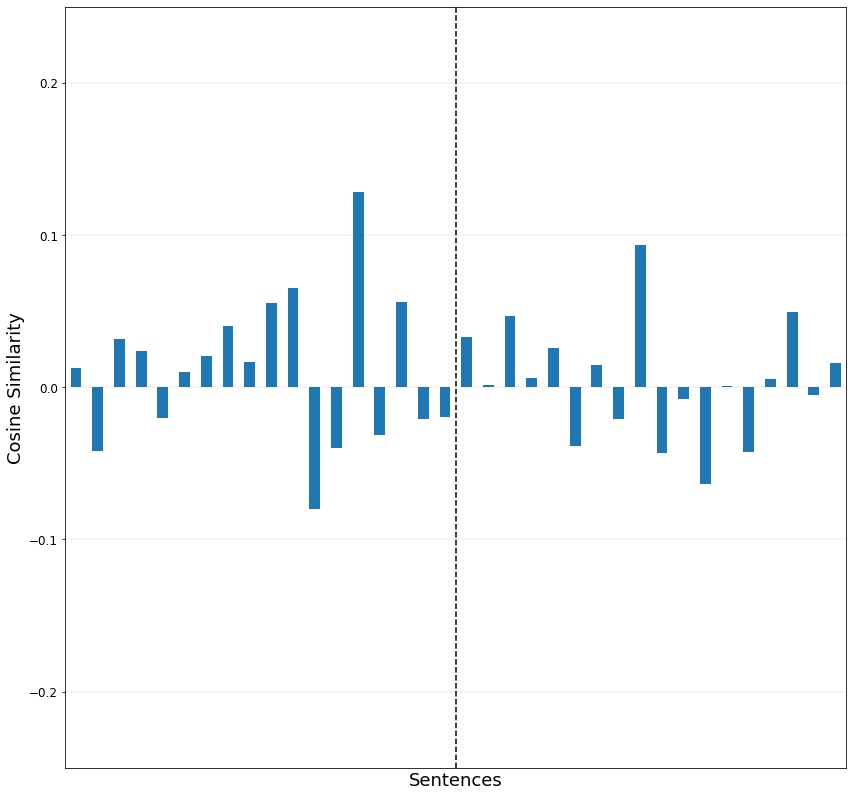

In [39]:
#ResponsibilityV
DimsTableR = []
lenght = len(thirty_six_fair_unfair)
sentence_embeddings_test_s = embed(thirty_six_fair_unfair)
        
        
for i in range(lenght):
    dot =  np.inner(ResponsibilityV,sentence_embeddings_test_s[i])
    DimsTableR.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
responsibility=pd.DataFrame(DimsTableR)
#df3.sort_values(by='Score', ascending=False)
        
responsibility['Score'] = responsibility['Score'].astype(float)
responsibility['Sentence'] = responsibility['Sentence'].astype(str)
responsibilityVec=responsibility

ax_res = responsibility.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))

ax_res.axvline(17.5, color='k', linestyle='--')
plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)
ax_res.set_facecolor("white")
ax_res.grid('on', which='major', axis='x' )
ax_res.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()



 

In [40]:
result_res=responsibility.sort_values(by='Score', ascending=False) 
print(result_res)

       Score                                  Sentence
13  0.128209         The principal thanked the student
26  0.093723               The father murdered the boy
10  0.065346  The student appreciated the tutor's help
15  0.055753              The teacher loved the pupils
9   0.055459      The president welcomed the immigrant
33  0.049196           The escapee raped the policeman
20  0.046914      The teenager slandered the attendant
7   0.040123              The man serenaded his fiancé
18  0.032764     The footballer damaged the goalkeeper
2   0.031450          The lecturer amused the students
22  0.025956          The killer disfigured the person
3   0.024128          The woman picnicked with the man
6   0.020514             The workers savoured the food
8   0.016805             The groom serenaded the bride
35  0.016018          The teacher crippled the student
24  0.014867             The guard dehumanized the boy
0   0.012397             The baby smiled at the father
5   0.0098

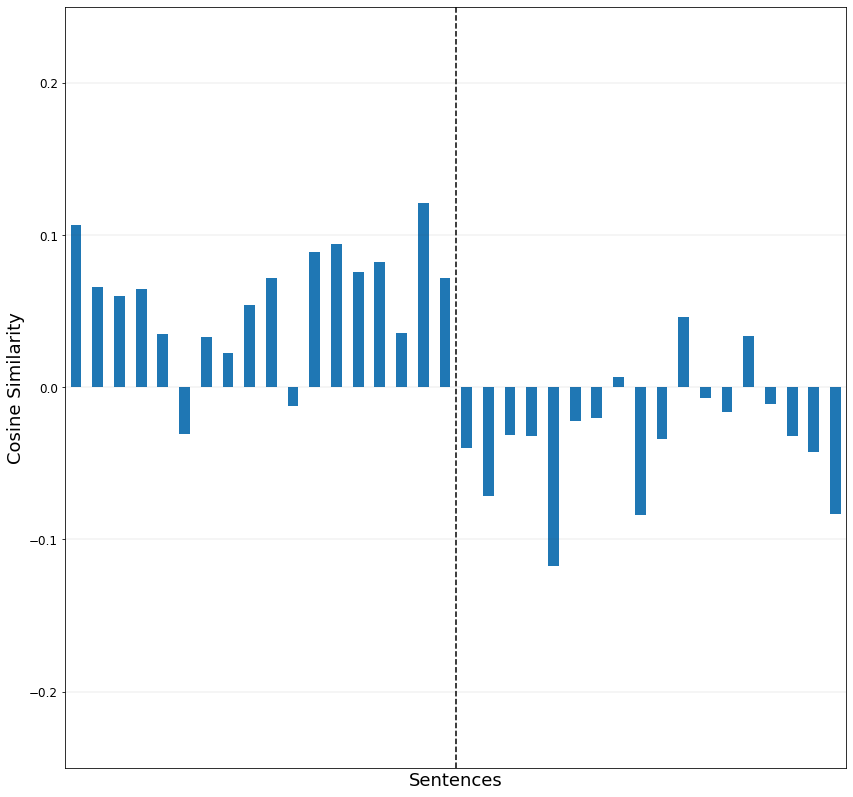

In [41]:
#EmotionV
DimsTableE = []
for i in range(lenght):
    dot =  np.inner(EmotionV,sentence_embeddings_test_s[i])
    DimsTableE.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df4=pd.DataFrame(DimsTableE)

        
df4['Score'] = df4['Score'].astype(float)
df4['Sentence'] = df4['Sentence'].astype(str)
emoVec=df4



ax_res = df4.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_res.axvline(17.5, color='k', linestyle='--')
plt.xticks([])

plt.ylim(-0.3, 0.3)
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)
ax_res.set_facecolor("white")
ax_res.grid('on', which='major', axis='x' )
ax_res.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()


In [42]:
result_emos=df4.sort_values(by='Score', ascending=False) 
print(result_emos)

       Score                                  Sentence
16  0.121061             The nanny comforted the child
0   0.106615             The baby smiled at the father
12  0.094449            The audience enjoyed the tenor
11  0.089021            The crowd acclaimed the singer
14  0.082462                 Jack celebrated with Jill
13  0.075841         The principal thanked the student
9   0.071846      The president welcomed the immigrant
17  0.071713                     Tom charmed the woman
1   0.066118               The man excused the visitor
3   0.064881          The woman picnicked with the man
2   0.059804          The lecturer amused the students
8   0.054373             The groom serenaded the bride
28  0.046447              The man demonized the people
15  0.035956              The teacher loved the pupils
4   0.035035               The nurse snuggled the baby
31  0.033730        The organizer mismanaged the crowd
6   0.032862             The workers savoured the food
7   0.0227

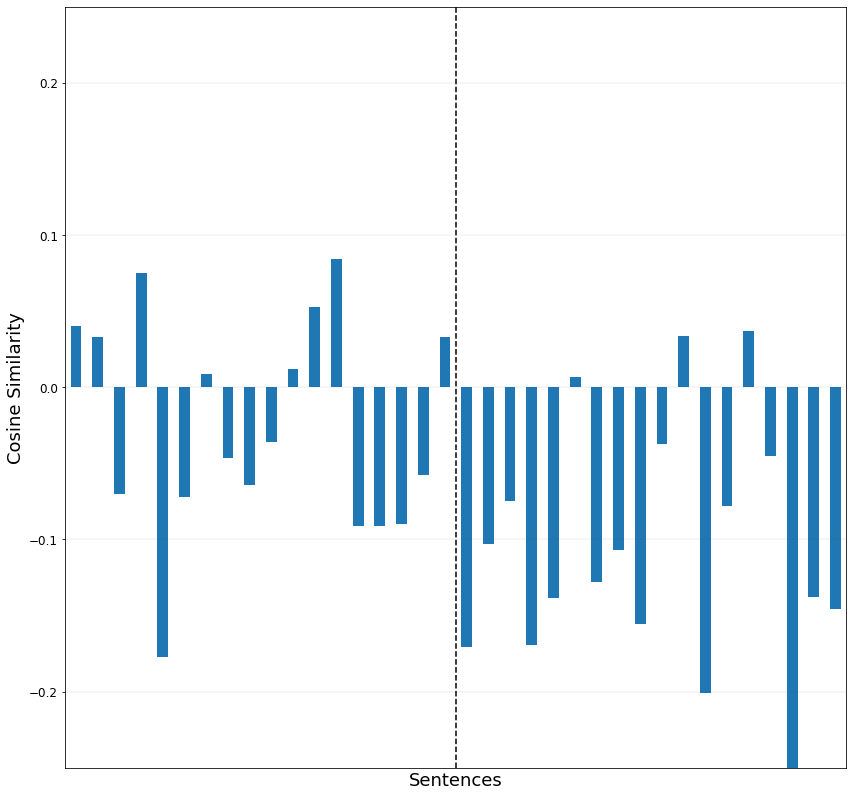

In [43]:
#ConsequenceV
DimsTableC = []
for i in range(lenght):
    dot =  np.inner(ConsequenceV,sentence_embeddings_test_s[i])
    DimsTableC.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df5=pd.DataFrame(DimsTableC)

        
df5['Score'] = df5['Score'].astype(float)
df5['Sentence'] = df5['Sentence'].astype(str)
ConsqVec=df5


ax_con = df5.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_con.axvline(17.5, color='k', linestyle='--')
ax_con.set_facecolor("white")

plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)


ax_con.grid('on', which='major', axis='x' )
ax_con.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()


In [44]:
result_consq=df5.sort_values(by='Score', ascending=False) 
print(result_consq)

       Score                                  Sentence
12  0.084535            The audience enjoyed the tenor
3   0.075072          The woman picnicked with the man
11  0.052419            The crowd acclaimed the singer
0   0.039936             The baby smiled at the father
31  0.036690        The organizer mismanaged the crowd
28  0.033448              The man demonized the people
17  0.033347                     Tom charmed the woman
1   0.032804               The man excused the visitor
10  0.011917  The student appreciated the tutor's help
6   0.008563             The workers savoured the food
23  0.006844      The saboteur contaminated the people
9  -0.036094      The president welcomed the immigrant
27 -0.037387    The attendant misinformed the customer
32 -0.045190                   Richard brutalized Noah
7  -0.046201              The man serenaded his fiancé
16 -0.057949             The nanny comforted the child
8  -0.063901             The groom serenaded the bride
2  -0.0702

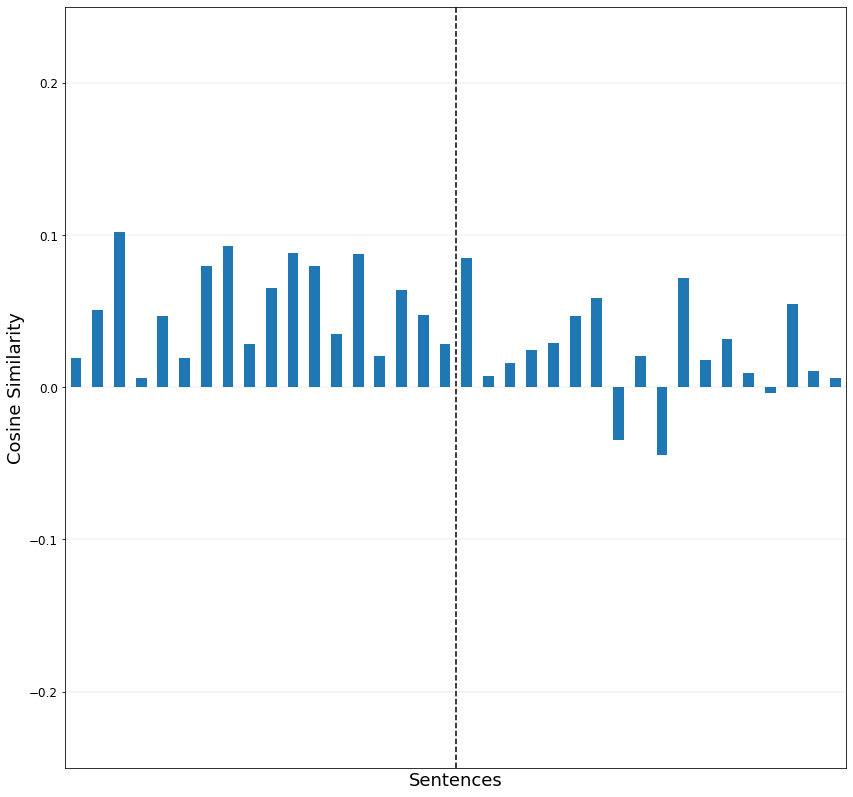

In [45]:
#BeneficialV
DimsTableM = []
for i in range(lenght):
    dot =  np.inner(BeneficialV,sentence_embeddings_test_s[i])
    DimsTableM.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df6=pd.DataFrame(DimsTableM)

        
df6['Score'] = df6['Score'].astype(float)
df6['Sentence'] = df6['Sentence'].astype(str)
BenVec=df6


ax_ben = df6.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_ben.axvline(17.5, color='k', linestyle='--')
ax_ben.set_facecolor("white")

plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)


ax_ben.grid('on', which='major', axis='x' )
ax_ben.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)


plt.show()


In [46]:
result_ben=df6.sort_values(by='Score', ascending=False) 
print(result_ben)

       Score                                  Sentence
2   0.101797          The lecturer amused the students
7   0.092591              The man serenaded his fiancé
10  0.088395  The student appreciated the tutor's help
13  0.087850         The principal thanked the student
18  0.084772     The footballer damaged the goalkeeper
6   0.079474             The workers savoured the food
11  0.079460            The crowd acclaimed the singer
28  0.071975              The man demonized the people
9   0.065319      The president welcomed the immigrant
15  0.064066              The teacher loved the pupils
24  0.058399             The guard dehumanized the boy
33  0.054494           The escapee raped the policeman
1   0.050889               The man excused the visitor
16  0.047552             The nanny comforted the child
4   0.047015               The nurse snuggled the baby
23  0.046855      The saboteur contaminated the people
12  0.035153            The audience enjoyed the tenor
30  0.0319

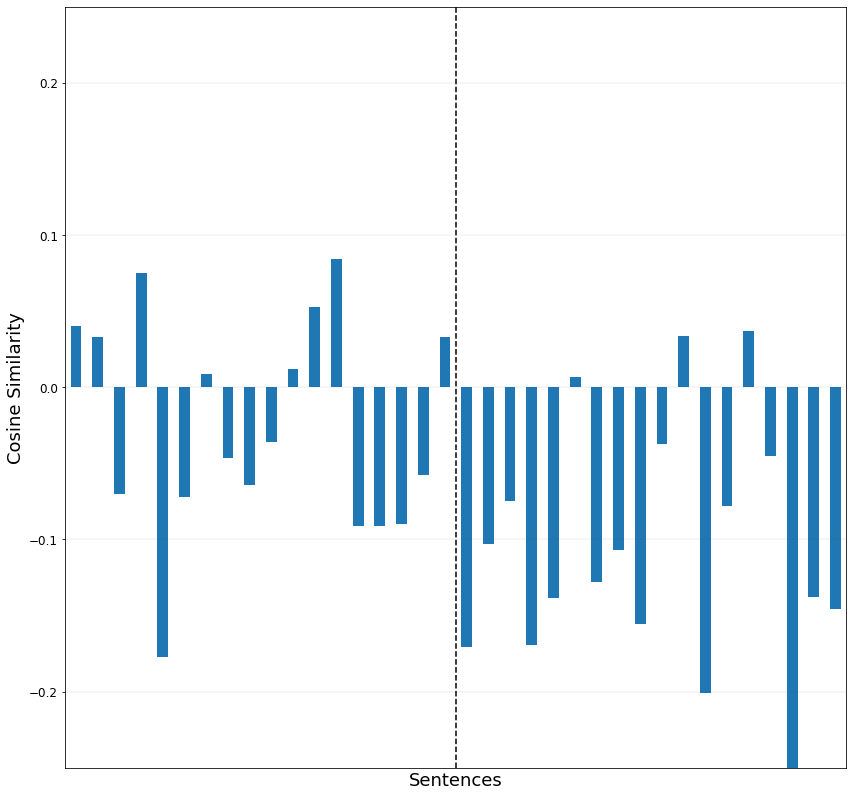

In [47]:
#HarmV
DimsTableH = []
for i in range(lenght):
    dot =  np.inner(HarmV,sentence_embeddings_test_s[i])
    DimsTableH.append(
            {
                'Score': dot,
                'Sentence':thirty_six_fair_unfair[i],
              
            }

    )                      
                                   
df7=pd.DataFrame(DimsTableH)

df7['Score'] = df7['Score'].astype(float)
df7['Sentence'] = df7['Sentence'].astype(str)
HarmVec=df7

ax_harm = df5.plot.bar(x='Sentence', y='Score', rot=90, legend=False, figsize=(14,14))
ax_harm.axvline(17.5, color='k', linestyle='--')
ax_harm.set_facecolor("white")

plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(color='0.3', linestyle='-', linewidth=0.1)
plt.ylabel('Cosine Similarity', fontsize=18)
plt.xlabel('Sentences', fontsize=18)


ax_harm.grid('on', which='major', axis='x' )
ax_harm.grid('on', which='major', axis='y' )
plt.ylim(-0.25, 0.25)
plt.show()


In [48]:
result_harm=df7.sort_values(by='Score', ascending=False) 
print(result_harm)

       Score                                  Sentence
10  0.121760  The student appreciated the tutor's help
1   0.072937               The man excused the visitor
17  0.071627                     Tom charmed the woman
24  0.070442             The guard dehumanized the boy
6   0.057699             The workers savoured the food
31  0.049426        The organizer mismanaged the crowd
13  0.047437         The principal thanked the student
0   0.045637             The baby smiled at the father
16  0.036019             The nanny comforted the child
32  0.033074                   Richard brutalized Noah
3   0.020645          The woman picnicked with the man
15  0.015369              The teacher loved the pupils
12  0.015153            The audience enjoyed the tenor
9   0.014161      The president welcomed the immigrant
35  0.003357          The teacher crippled the student
8  -0.001214             The groom serenaded the bride
5  -0.010485                           Jim hugged Sara
34 -0.0116

In [49]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=6)
  fig, ax = plt.subplots(figsize=(100,100))  
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd",
      square=True, annot=True)
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")
    
def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

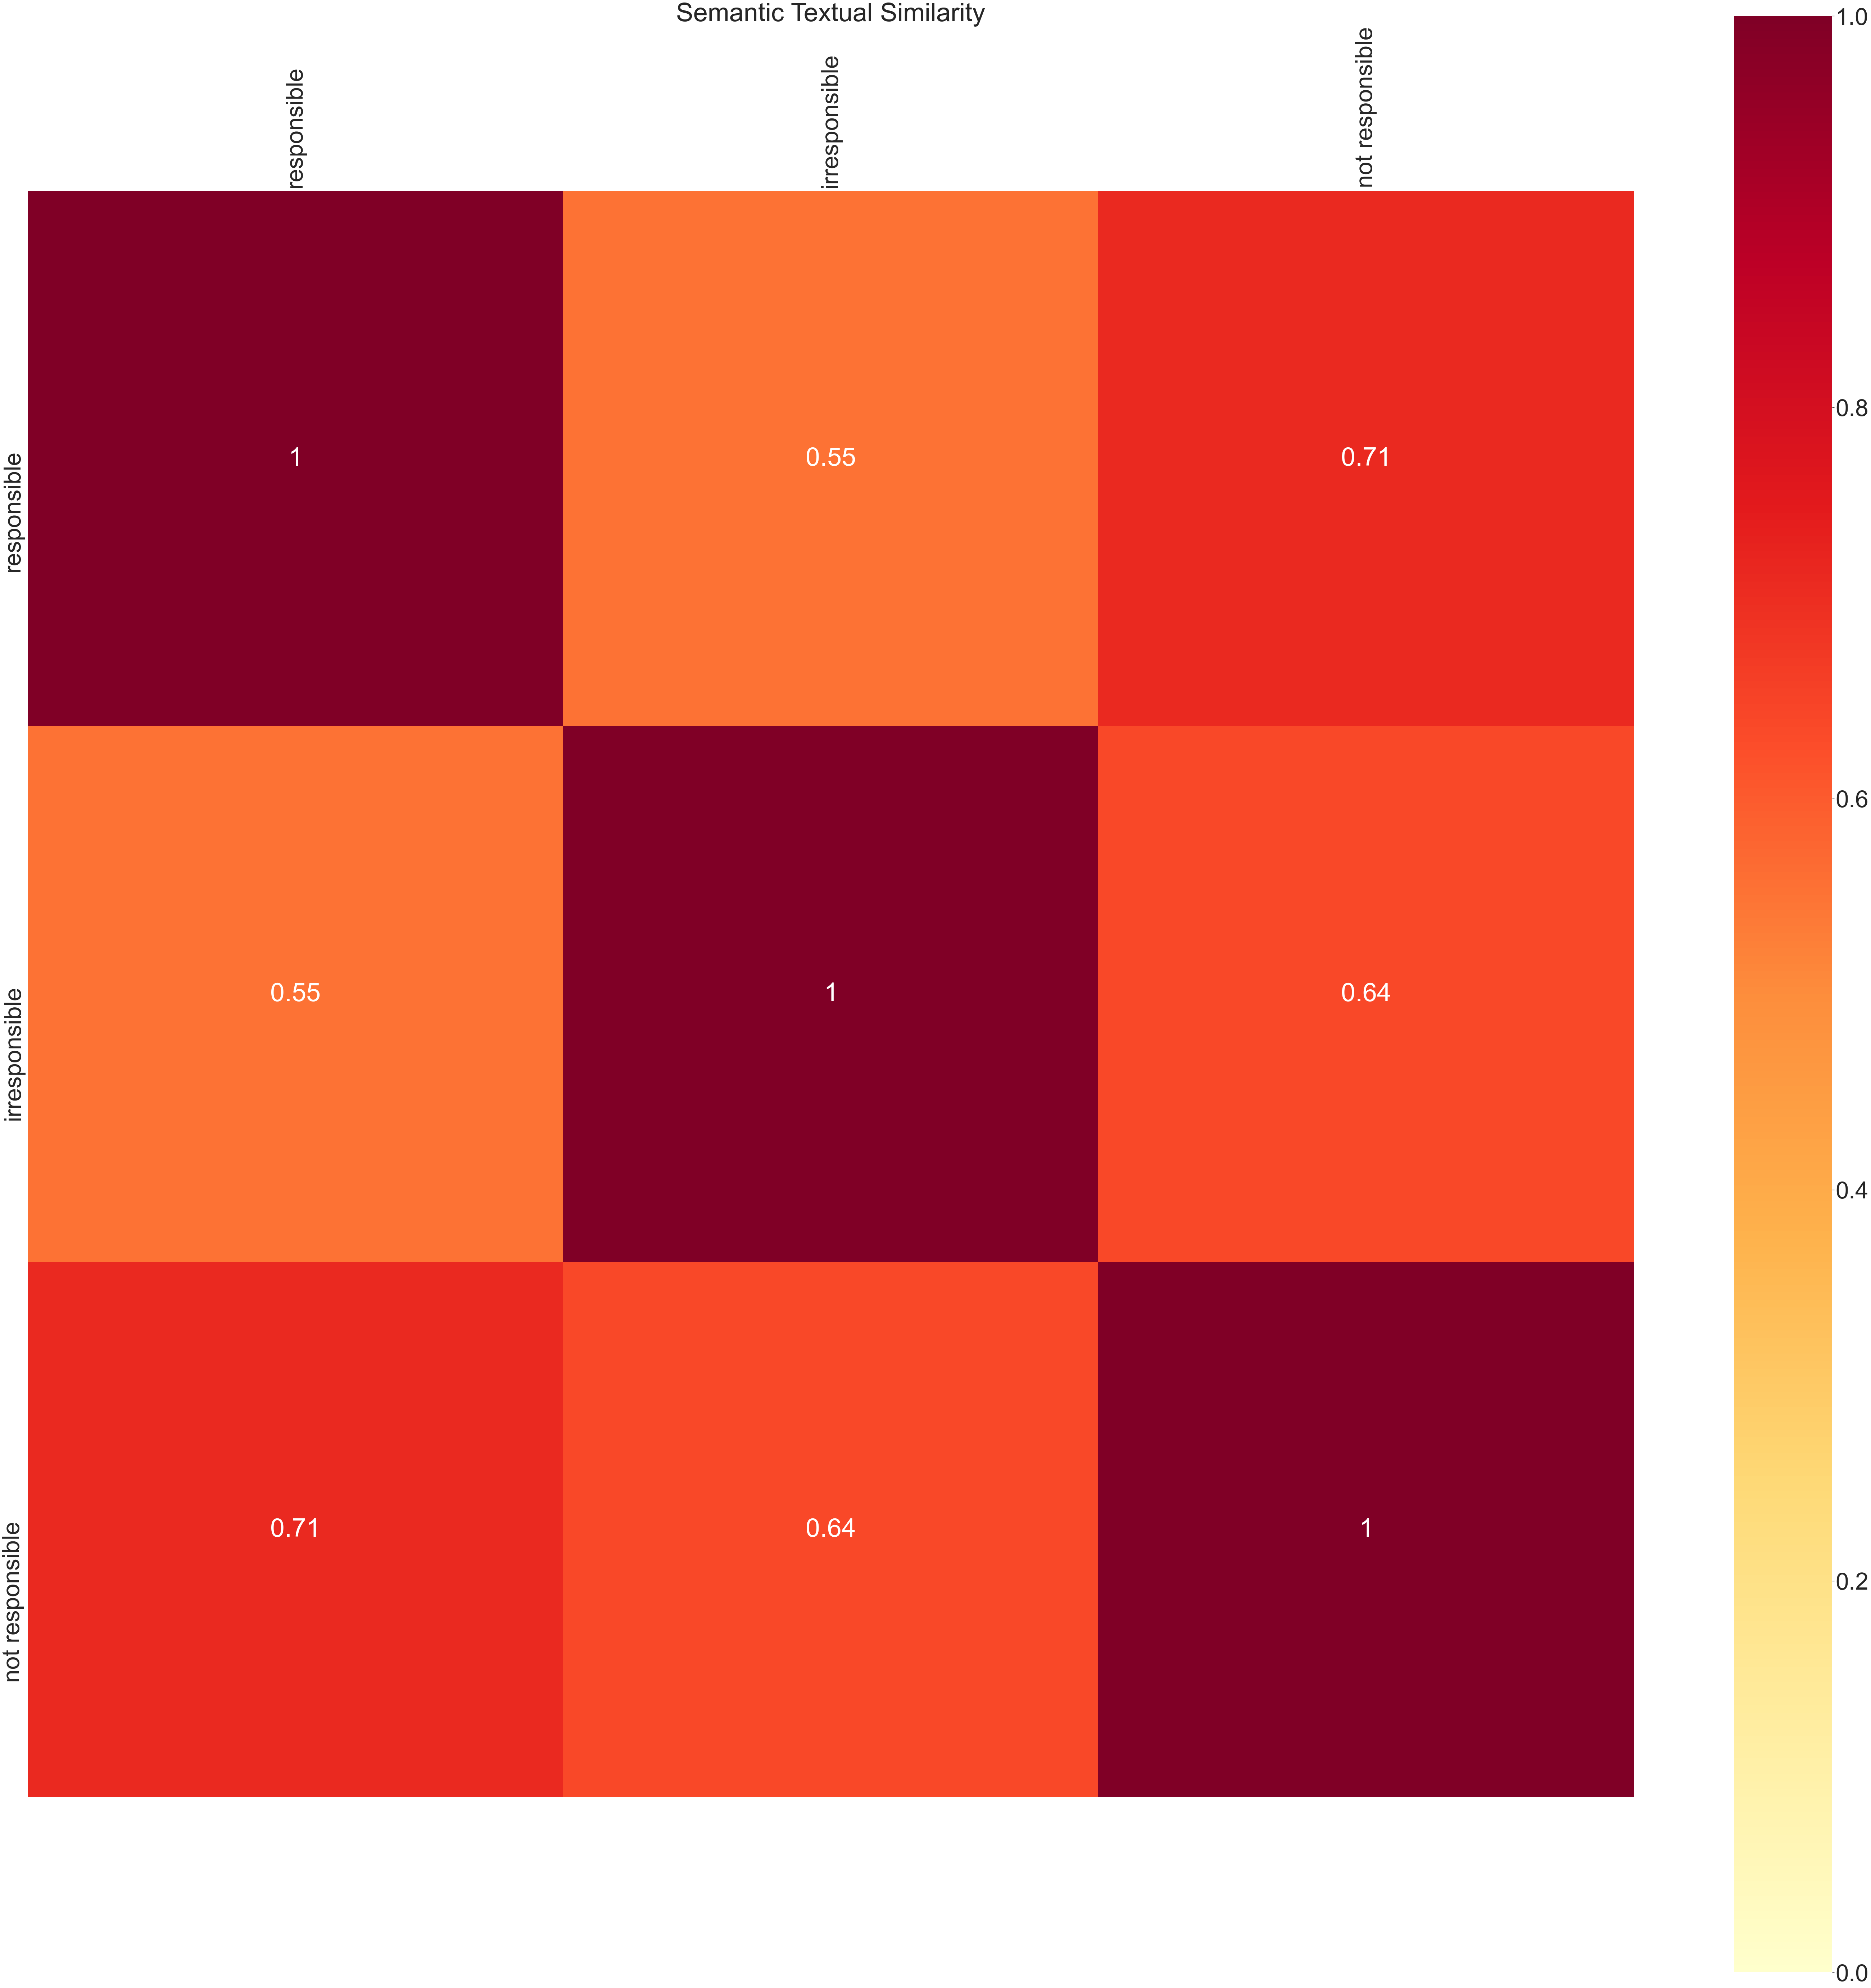

In [50]:
#Test similarity score of USE for Vector phrases 
messages = [
    
    "responsible",
   
    "irresponsible",
    
    "not responsible",
   
   
]

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

run_and_plot(messages)

